# PEC 3 - Web Scraping Streaming

En esta PEC vamos a **continuar trabajando el web scraping**. Vamos a prestar principal atención al web scraping en streaming que és el objetivo del reto. Además, continuaremos explorando otras librerías que nos permiten hacer web scraping, como request-html y SerPapi.

Por tanto, la PEC se va a dividir en **3 PARTES**: Web Scraping en Streaming, Web Scraping con Requests-html y, Web Scraping con SerPapi.


Mencionar que, en algunos ejercicios se va a motivar el uso de los selectores CSS y los XPath. 
**Los selectores CSS y XPath** son expresiones que permiten seleccionar elementos de un documento HTML basados en sus clases o en la ubicación dentro del contenido. 
Una referencia interesante de los mismos la podéis encontrar en las siguientes dos páginas web: https://www.w3schools.com/xml/xpath_syntax.asp, https://www.w3schools.com/cssref/css_selectors.asp 




_Ejemplo:_



*   _p.intro.rellevant_: seleccionaría los elementos _párrafo_ con valores de classe iguales a 'intro' y 'rellevant'.  
*   _div > p_ : selecciona todos los elementos _\<p>_ donde el padre sea un elemento \<div>.




## Parte 1. Web Scraping (Streaming)

El Web scraping en streaming consiste básicamente en extraer datos de la web cuando estos datos cambian en tiempo real. Un claro ejemplo sería la extracción de datos procedentes de redes sociales.

Para trabajar esta parte vamos a extraer datos de la red social Twitter. Para ello, vamos a utilizar la API  de Twitter. Esta API necesita registrarse y acceder con una clave (Api KEY).

El primer paso, por tanto, es acceder al centro de desarrolladores de aplicaciones de Twitter (https://apps.twitter.com). Aquí deberéis entrar con vuestra cuenta twitter. En caso de no tener cuenta, previamente se recomienda que os creeis una para la realización de la PAC y que después de entregar la PAC, si no la queréis conservar, la eliminéis.

**Los pasos que debéis seguir para registraros, se han detallado en el anexo del documento del enunciado de la PAC.**

Una vez registrados y haber solicitado las credenciales, cuando recibamos la aprobación y tengamos acceso a nuestras claves, podemos empezar a obtener información disponible de Twitter. 

Para hacer web scraping en Twitter, vamos a utilizar la librería **tweepy**. Esta cuenta con diferentes funciones que nos permiten obtener información de las cuentas y sobre los tweets más recientes. Durante la realización de la PAC, vamos a utilizar básicamente dos funciones: API.user_timeline() y API.get_user(). 
En la página web de la librería
(https://tweepy.readthedocs.io/en/latest/api.html#tweepy-api-twitter-api-wrapper) encontraréis información relativa a las prestaciones de la misma. Os recomendamos que la reviséis para conocer más detalles.

Antes de empezar con el ejercicio práctico, vamos a trabajar un ejemplo que nos permitirá familiarizarnos con la librería y con las funciones que se precisarán utilizar para resolver el ejercicio. En el siguiente ejemplo, por tanto, vamos a obtener las características relativas a una cuenta de twitter, concretamente la de la UOC (@UOCuniversitat), y la fecha de su tweet más reciente. 

En primer lugar, tenemos que definir las librerías y las claves de acceso (consumer_key, consumer_secret, access_token, access_token_secret) a la API de Twitter.

In [1]:
# Definición librerías
!pip install tweepy
import tweepy
from tweepy import API

In [6]:
# Definimos las claves de acceso
consumer_key = 'mrGMWjWNsHw6av37kVNiFwOYJ'
consumer_secret = 'wzZViYcrY4wvcQiL61O5x7gA9BgHmj3RMEP09S4nCf8lqpv7dJ'
access_token = '339916718-tNyzsXBfrkMBz393jBs5zPnulM4zEwe5g80bNalD'
access_token_secret = '6IiTjKfotAf67V6dCt19XWWWr1dagYTUJw1GHXuexQHGx'

In [7]:
# Importamos 
from tweepy import OAuthHandler

In [8]:
# Definimos la autentificación y establecemos la conexión
auth = OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_token_secret)
            
auth_api = API(auth)

Ahora, vamos a conocer los detalles de la cuenta @UOCuniversitat. Los campos que nos interesan son el nombre ('name'), la ubicación ('location'), el número de seguidores ('followers_count'), el número de seguidos ('friends_count') y cuándo se creó la cuenta ('created_at'). 




In [9]:
detalles_cuenta_UOC = auth_api.get_user(screen_name='UOCuniversitat')
detalles_cuenta_UOC

User(_api=<tweepy.api.API object at 0x0000017DCDF69EE0>, _json={'id': 14919552, 'id_str': '14919552', 'name': 'UOCuniversitat', 'screen_name': 'UOCuniversitat', 'location': 'Barcelona', 'profile_location': None, 'description': "Twitter oficial en català de la Universitat Oberta de Catalunya #25anysUOC En español: @UOCuniversidad. In English: @UOCuniversity. Servei d'atenció: @UOCrespon", 'url': 'https://t.co/fespNI6W2X', 'entities': {'url': {'urls': [{'url': 'https://t.co/fespNI6W2X', 'expanded_url': 'http://25.uoc.edu', 'display_url': '25.uoc.edu', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 39859, 'friends_count': 2784, 'listed_count': 1088, 'created_at': 'Tue May 27 11:19:19 +0000 2008', 'favourites_count': 4090, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 31293, 'lang': None, 'status': {'created_at': 'Fri Nov 04 15:02:45 +0000 2022', 'id': 1588547304872677376, 'id_str': '15885473048

Después de observar qué forma tiene la respuesta recibida, para obtener y organizar la información de interés tendremos que ejecutar las siguientes lineas de código:

In [10]:
dict_uoc={'UOCuniversitat': {'nombre': detalles_cuenta_UOC.name,
                             'ubicacion': detalles_cuenta_UOC.location,
                             'seguidores':detalles_cuenta_UOC.followers_count,
                             'seguidos':detalles_cuenta_UOC.friends_count,
                             'fecha_creacion':str(detalles_cuenta_UOC.created_at)}
}
dict_uoc

{'UOCuniversitat': {'nombre': 'UOCuniversitat',
  'ubicacion': 'Barcelona',
  'seguidores': 39859,
  'seguidos': 2784,
  'fecha_creacion': '2008-05-27 11:19:19+00:00'}}

Ahora vamos a obtener la fecha del último tweet de la cuenta @UOCuniversitat:

In [11]:
tweets_uoc=auth_api.user_timeline(screen_name='UOCuniversitat')

In [12]:
fechas=[]

for tweet in tweets_uoc:
    fechas.append(tweet.created_at)

print('El Tweet más reciente tiene fecha de: ', max(fechas))

El Tweet más reciente tiene fecha de:  2022-11-04 15:02:45+00:00


In [13]:
len(tweets_uoc)

20

**Observaciones:**

- Por defecto, la función *user_timeline()* devuelve 20 instancias.
- El nombre de usuario debe indicarse sin el símbolo '@'
- La forma de la respuesta que devuelve la función *user_timeline()* és la siguiente:


In [14]:
tweets_uoc[0]

Status(_api=<tweepy.api.API object at 0x0000017DCDF69EE0>, _json={'created_at': 'Fri Nov 04 15:02:45 +0000 2022', 'id': 1588547304872677376, 'id_str': '1588547304872677376', 'text': '🏆🤝 La #UOC és finalista dels Premis @Corresponsables que reconeixen bones pràctiques en Responsabilitat Social,… https://t.co/WRb7xIPiGX', 'truncated': True, 'entities': {'hashtags': [{'text': 'UOC', 'indices': [6, 10]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Corresponsables', 'name': 'Corresponsables', 'id': 87917306, 'id_str': '87917306', 'indices': [36, 52]}], 'urls': [{'url': 'https://t.co/WRb7xIPiGX', 'expanded_url': 'https://twitter.com/i/web/status/1588547304872677376', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [113, 136]}]}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user':

> Si nos fijamos, se puede conocer si el tweet contiene algún hashtag obteniendo el contenido de _.entities ['hashtag']_

### **Ejercicio práctico 1 (Twitter)** 

En este ejercicio se pide que se obtenga información de las cuentas de Twiteer de los 20 perfiles que en 2021 fueron considerados los más influyentes en Twitter segun Brandwatch, información disponible en la siguiente página web https://www.thetealmango.com/featured/top-50-most-influential-people-on-twitter/. (En esta página se muestran 50, pero nos quedaremos con los top20).

Para su consecución, este ejercicio se va a dividir en dos partes: La primera relativa a la obtención de las cuentas que vamos a inverstigar; y, la segunda relativa a la obtención de información de estas cuentas en Twitter.


**PARTE 1:** Web Scraping de https://www.thetealmango.com/featured/top-50-most-influential-people-on-twitter/ para obtener los usuarios.

- El objetivo es scrapear el nombre de los usuarios más influyentes en Twitter durante el 2021. Para ello, se recomienda que se utilize la librería _BeautifulSoap_ y se siga el proceso de web scraping de forma análoga a como se realizó en la PEC anterior. Una vez obtenidos los usuarios (estos se corresponden con los valores de la columna 'Handle' de la tabla), crear una lista que contenga los usuarios top20 (los 20 primeros usuarios de la lista), la cual será utilizada en la siguiente parte. A los nombre de usuarios hay que eliminar el simbolo '@' para poder ser utilizados en la parte 2.

**PARTE 2:** Web Scraping en Twitter para obtener la información de las cuentas de los 20 usuarios obtenidos en la parte anterior y la información de sus 20 últimos tweets. En este caso, se utilizará la librería vista en el ejemplo anterior (_tweepy_)

- La información que se solicita conocer de cada una de las 20 cuentas es la siguiente: nombre ('name'), usuario ('screen_name'), ubicación ('location'), fecha de creación de la cuenta ('created_at'), número de seguidores ('followers_count'), número de amigos o seguidos ('friends_count').

- Una vez obtenidos los datos, estos deberan ser organizados en un dataframe, de forma que cada columna sea un campo de los anteriores y cada fila haga referencia a cada uno de los usuarios. 

- Cuando esté creado el dataframe, ordenarlo por número de seguidores, de forma qeu podamos ver en la primera fila la cuenta con mayor número de seguidores.

**PARTE 3:** En esa última parte obtendremos los 20 últimos tweets de los usuarios de la parte anterior para analizar si han mencionado los mismos Hashtags.

- De los usuarios, cargar los 20 últimos tweets y obtener una lista que contenga todos los **hastags** que han aparecido en alguno de estos tweets de cada cuenta de usuario considerada. 

- Una vez obtenida esta información, podemos organizarla en forma de diccionario dónde una columna sea el nombre de usuario y la otra la lista separada por comas de los hashtags obtenidos en cada usuario; o en forma de diccionario, donde el valor de la clave sea el nobre de usuario y el valor una lista con los diferentes hashtags encontrados por usuario. 

- Finalmente vamos a analizar por cada Hashtag, qué cuenta lo hamencionado. Con esa información, vamos a mostrar qué Hashtag(s) ha(n) sido mencionado(s) por más de un usuario (en caso de que los haya).

> **NOTA:** En la parte 2, tanto para obtener la información relativa de las cuentas como la de los tweets, se recomienda hacer un bucle en el que en cada iteración se obtenga la información de cada usuario. Además, al final de cada iteración, antes de pasar a la siguiente, se aconseja esperar 4 segundos. Para ello, se puede utilizar la funcion time.sleep(4) de la librería times.

In [15]:
# Cargar librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd

**PARTE 1**

In [16]:
# Obtener contenido del documento html relativo al nombre de usuario de las cuentas Twitter  (lista_usuarios)
url_base='https://www.thetealmango.com/featured/top-50-most-influential-people-on-twitter/'

# Hacer la solicitud
respuesta = requests.get(url_base)
respuesta.status_code

# Extraer el HTML
html = respuesta.content

# Convertir HTML a BeautifulSoup object. 
soup = BeautifulSoup(html, 'lxml')

# Exportiar el HTML a un archivo
with open('twitter_respuesta.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

In [17]:
# Obtener valores tabla

tabla= soup.find("table")
trs=tabla.find("tbody").find_all('tr')

names= [tr.find_all('td')[1].text for tr in trs]
users= [tr.find_all('td')[3].text for tr in trs]
order_users=[tr.find_all('td')[0].text for tr in trs]

In [18]:
# Mostrar valores 

print(names)
print(users)
print(order_users)

['Name', 'Taylor Swift', 'Narendra Modi', 'Katy Perry', 'Elon Musk', 'Barack Obama', 'Cristiano Ronaldo', 'Ariana Grande', 'Lady Gaga', 'Ellen DeGeneres', 'Kim Kardashian', 'Bill Gates', 'Jennifer Lopez', 'Justin Bieber', 'Rihanna', 'Selena Gomez', 'Justin Timberlake', 'Shakira', 'Jimmy Fallon', 'LeBron James', 'Miley Cyrus', 'Oprah Winfrey', 'Niall Horan', 'Harry Styles', 'Kanye West', 'Hilary Clinton', 'Zayn Malik', 'Eminem', 'Ricky Gervais', 'Rachel Maddow', 'Sean Hannity', 'Takafumi Horie', 'Demi Lovato', 'Bruno Mars', 'Drake', 'Sachin Tendulkar', 'Louis Tomlinson', 'Liam Payne', 'Chris Brown', 'Pink', 'Conan O’Brien', 'Nicki Minaj', 'Mariah Carey', 'Michelle Obama', 'Avril Lavigne', 'Leonardo DiCaprio', 'Danilo Gentili', 'Elissa', 'Beyonce', 'Dwayne Johnson', 'Nick Jonas']
['Handle', '@taylorswift13', '@narendramodi', '@katyperry', '@elonmusk', '@BarackObama', '@Cristiano', '@ArianaGrande', '@ladygaga', '@TheEllenShow', '@KimKardashian', '@BillGates', '@JLo', '@justinbieber', '@ri

In [19]:
# Obtener 20 primeros

lista_usuarios=[element[:] for element in users[1:21]]

In [20]:
# Imprimir lista de usuarios
print(lista_usuarios)

['@taylorswift13', '@narendramodi', '@katyperry', '@elonmusk', '@BarackObama', '@Cristiano', '@ArianaGrande', '@ladygaga', '@TheEllenShow', '@KimKardashian', '@BillGates', '@JLo', '@justinbieber', '@rihanna', '@selenagomez', '@jtimberlake', '@shakira', '@jimmyfallon', '@KingJames', '@MileyCyrus']


**PARTE 2**

In [21]:
# Cargar librerías
import tweepy
from tweepy import OAuthHandler
from tweepy import API

In [22]:
# Definir claves de acceso
consumer_key = 'mrGMWjWNsHw6av37kVNiFwOYJ'
consumer_secret = 'wzZViYcrY4wvcQiL61O5x7gA9BgHmj3RMEP09S4nCf8lqpv7dJ'
access_token = '339916718-tNyzsXBfrkMBz393jBs5zPnulM4zEwe5g80bNalD'
access_token_secret = '6IiTjKfotAf67V6dCt19XWWWr1dagYTUJw1GHXuexQHGx'

In [23]:
# Definir la autentificación y establecer la conexión

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
            
auth_api = API(auth)

In [24]:
# Obtener detalles/ información de cada una las 20 cuentas de usuario (lista_usuarios)

import time

users_info=[]
for user in lista_usuarios:
    print ('OTENIENDO DATOS DE ' + user)
    try:
        item = auth_api.get_user(screen_name=user)
        users_info.append([item.name, item.screen_name, item.location, str(item.created_at), item.friends_count, item.followers_count])
        
    except Exception:
        continue
    time.sleep(1)

OTENIENDO DATOS DE @taylorswift13
OTENIENDO DATOS DE @narendramodi
OTENIENDO DATOS DE @katyperry
OTENIENDO DATOS DE @elonmusk
OTENIENDO DATOS DE @BarackObama
OTENIENDO DATOS DE @Cristiano
OTENIENDO DATOS DE @ArianaGrande
OTENIENDO DATOS DE @ladygaga
OTENIENDO DATOS DE @TheEllenShow
OTENIENDO DATOS DE @KimKardashian
OTENIENDO DATOS DE @BillGates
OTENIENDO DATOS DE @JLo
OTENIENDO DATOS DE @justinbieber
OTENIENDO DATOS DE @rihanna
OTENIENDO DATOS DE @selenagomez
OTENIENDO DATOS DE @jtimberlake
OTENIENDO DATOS DE @shakira
OTENIENDO DATOS DE @jimmyfallon
OTENIENDO DATOS DE @KingJames
OTENIENDO DATOS DE @MileyCyrus


In [25]:
# Mostramos la información

users_info

[['Taylor Swift',
  'taylorswift13',
  '',
  '2008-12-06 10:10:54+00:00',
  0,
  91696687],
 ['Narendra Modi',
  'narendramodi',
  'India',
  '2009-01-10 17:18:56+00:00',
  2445,
  84078478],
 ['KATY PERRY', 'katyperry', '', '2009-02-20 23:45:56+00:00', 245, 108898335],
 ['Elon Musk',
  'elonmusk',
  'Hell',
  '2009-06-02 20:12:29+00:00',
  127,
  114092336],
 ['Barack Obama',
  'BarackObama',
  'Washington, DC',
  '2007-03-05 22:08:25+00:00',
  575811,
  133393742],
 ['Cristiano Ronaldo',
  'Cristiano',
  '',
  '2010-06-14 19:09:20+00:00',
  62,
  104493096],
 ['Lady Gaga', 'ladygaga', '', '2008-03-26 22:37:48+00:00', 117164, 84972806],
 ['Ellen DeGeneres',
  'TheEllenShow',
  'California',
  '2008-08-14 03:50:42+00:00',
  26122,
  77170669],
 ['Kim Kardashian',
  'KimKardashian',
  ' ',
  '2009-03-19 19:21:56+00:00',
  123,
  74060255],
 ['Bill Gates',
  'BillGates',
  'Seattle, WA',
  '2009-06-24 18:44:10+00:00',
  506,
  60943225],
 ['jlo', 'JLo', 'Bronx, NY', '2009-10-27 16:24:51+

In [26]:
# Organizar dataframe relativo a los detalles de las cuentas (df_detalles_cuentas)

df_detalles_cuentas=pd.DataFrame(users_info, columns=['Nombre','usuario','ubicacion','fecha_creacion','seguidos','seguidores'])
df_detalles_cuentas['seguidores']=df_detalles_cuentas['seguidores'].astype(int)
df_detalles_cuentas['seguidos']=df_detalles_cuentas['seguidos'].astype(int)

In [27]:
# Visualizar dataframe

df_detalles_cuentas

,Nombre,usuario,ubicacion,fecha_creacion,seguidos,seguidores
0,Taylor Swift,taylorswift13,,2008-12-06 10:10:54+00:00,0,91696687
1,Narendra Modi,narendramodi,India,2009-01-10 17:18:56+00:00,2445,84078478
2,KATY PERRY,katyperry,,2009-02-20 23:45:56+00:00,245,108898335
3,Elon Musk,elonmusk,Hell,2009-06-02 20:12:29+00:00,127,114092336
4,Barack Obama,BarackObama,"Washington, DC",2007-03-05 22:08:25+00:00,575811,133393742
5,Cristiano Ronaldo,Cristiano,,2010-06-14 19:09:20+00:00,62,104493096
6,Lady Gaga,ladygaga,,2008-03-26 22:37:48+00:00,117164,84972806
7,Ellen DeGeneres,TheEllenShow,California,2008-08-14 03:50:42+00:00,26122,77170669
8,Kim Kardashian,KimKardashian,,2009-03-19 19:21:56+00:00,123,74060255
9,Bill Gates,BillGates,"Seattle, WA",2009-06-24 18:44:10+00:00,506,60943225


In [28]:
# Ordenar el dataframe y visualizar

df_detalles_cuentas.sort_values('seguidores', ascending=False)

,Nombre,usuario,ubicacion,fecha_creacion,seguidos,seguidores
4,Barack Obama,BarackObama,"Washington, DC",2007-03-05 22:08:25+00:00,575811,133393742
3,Elon Musk,elonmusk,Hell,2009-06-02 20:12:29+00:00,127,114092336
11,Justin Bieber,justinbieber,The 6,2009-03-28 16:41:22+00:00,281886,113859430
2,KATY PERRY,katyperry,,2009-02-20 23:45:56+00:00,245,108898335
12,Rihanna,rihanna,,2009-10-02 21:37:33+00:00,985,107090060
5,Cristiano Ronaldo,Cristiano,,2010-06-14 19:09:20+00:00,62,104493096
0,Taylor Swift,taylorswift13,,2008-12-06 10:10:54+00:00,0,91696687
6,Lady Gaga,ladygaga,,2008-03-26 22:37:48+00:00,117164,84972806
1,Narendra Modi,narendramodi,India,2009-01-10 17:18:56+00:00,2445,84078478
7,Ellen DeGeneres,TheEllenShow,California,2008-08-14 03:50:42+00:00,26122,77170669


**PARTE 3**

In [29]:
# Obtener información 20 últimos Tweets de cada una las 20 cuentas de usuario (lista_usuarios)

import time

users_hashtags={}
for user in lista_usuarios:
    print ('OTENIENDO TWEETS DE ' + user)
    try:
        users_hashtags[user]=[]
        element = auth_api.user_timeline(screen_name=user)
        for tweet in element:
            for hashtag in tweet.entities['hashtags']:
                users_hashtags[user].append(hashtag['text'])
                print(hashtag['text'])


    except Exception:
        continue
    time.sleep(1)

OTENIENDO TWEETS DE @taylorswift13
OTENIENDO TWEETS DE @narendramodi
OTENIENDO TWEETS DE @katyperry
YesOn28
LegoPartner
KatyPerryAboutYou
shoesdaytuesday
OTENIENDO TWEETS DE @elonmusk
OTENIENDO TWEETS DE @BarackObama
OTENIENDO TWEETS DE @Cristiano
CR7
Merc
NikeFC
WellDoneLads
Theragun
mufc
ClearxCR7
WeStandUnited
alwaystogether
mufc
OTENIENDO TWEETS DE @ArianaGrande
OTENIENDO TWEETS DE @ladygaga
WeLoveYouGaga
WeLoveYouGaga
ChromaticaBallMiami
monster
ChromaticaBallLA
OTENIENDO TWEETS DE @TheEllenShow
FBF
NationalHousewifeDay
QueerEye
OTENIENDO TWEETS DE @KimKardashian
KardashianKloset
OTENIENDO TWEETS DE @BillGates
NTDs
BESummit2022
GrandChallenges
GrandChallenges
OTENIENDO TWEETS DE @JLo
20yearsofTHISISMETHEN
thisisme
jlo
jenniferlopez
FromTheArchives
ThisIsMeThen
20yearsofTHISISMETHEN
ThisIsMeThen
countdown
MarryMe
Halftime
CoachHoliday
CoachNY
CoachHoliday
CoachNY
JenniferLopez
JLoBeauty
ThisIsMe
SelfCare
HappyWeekend
TakingAMoment
OTENIENDO TWEETS DE @justinbieber
GarenaFreeFire
FF

In [30]:
# Mostrar dataframe/diccionario relativo a los tweets de las cuentas

users_hashtags

{'@taylorswift13': [],
 '@narendramodi': [],
 '@katyperry': ['YesOn28',
  'LegoPartner',
  'KatyPerryAboutYou',
  'shoesdaytuesday'],
 '@elonmusk': [],
 '@BarackObama': [],
 '@Cristiano': ['CR7',
  'Merc',
  'NikeFC',
  'WellDoneLads',
  'Theragun',
  'mufc',
  'ClearxCR7',
  'WeStandUnited',
  'alwaystogether',
  'mufc'],
 '@ArianaGrande': [],
 '@ladygaga': ['WeLoveYouGaga',
  'WeLoveYouGaga',
  'ChromaticaBallMiami',
  'monster',
  'ChromaticaBallLA'],
 '@TheEllenShow': ['FBF', 'NationalHousewifeDay', 'QueerEye'],
 '@KimKardashian': ['KardashianKloset'],
 '@BillGates': ['NTDs', 'BESummit2022', 'GrandChallenges', 'GrandChallenges'],
 '@JLo': ['20yearsofTHISISMETHEN',
  'thisisme',
  'jlo',
  'jenniferlopez',
  'FromTheArchives',
  'ThisIsMeThen',
  '20yearsofTHISISMETHEN',
  'ThisIsMeThen',
  'countdown',
  'MarryMe',
  'Halftime',
  'CoachHoliday',
  'CoachNY',
  'CoachHoliday',
  'CoachNY',
  'JenniferLopez',
  'JLoBeauty',
  'ThisIsMe',
  'SelfCare',
  'HappyWeekend',
  'TakingAMom

Q: ¿Hay algún hashtag que se repite en más de una cuenta? Si es el caso, ¿en cúantas cuentas se repite?
  

_Respuesta:_

In [31]:
# Hacemos la inversa: diccionario dónde cada Key sea un Hashtag y por valores las cuentas que lo han mencionado

repetidos ={}
for key, value in users_hashtags.items():
    value_unique = [*set(value)]
    for hashtag in value_unique:
        if hashtag not in repetidos:
            repetidos[hashtag] = [key]
        else:
            if repetidos[hashtag] == [key]:
                next
            else:
                repetidos[hashtag].append(key)

repetidos

{'YesOn28': ['@katyperry'],
 'KatyPerryAboutYou': ['@katyperry'],
 'shoesdaytuesday': ['@katyperry'],
 'LegoPartner': ['@katyperry'],
 'ClearxCR7': ['@Cristiano'],
 'WellDoneLads': ['@Cristiano'],
 'WeStandUnited': ['@Cristiano'],
 'NikeFC': ['@Cristiano'],
 'alwaystogether': ['@Cristiano'],
 'Theragun': ['@Cristiano'],
 'Merc': ['@Cristiano'],
 'mufc': ['@Cristiano'],
 'CR7': ['@Cristiano'],
 'WeLoveYouGaga': ['@ladygaga'],
 'monster': ['@ladygaga'],
 'ChromaticaBallMiami': ['@ladygaga'],
 'ChromaticaBallLA': ['@ladygaga'],
 'QueerEye': ['@TheEllenShow'],
 'FBF': ['@TheEllenShow'],
 'NationalHousewifeDay': ['@TheEllenShow'],
 'KardashianKloset': ['@KimKardashian'],
 'BESummit2022': ['@BillGates'],
 'GrandChallenges': ['@BillGates'],
 'NTDs': ['@BillGates'],
 'jlo': ['@JLo'],
 'JenniferLopez': ['@JLo'],
 'HappyWeekend': ['@JLo'],
 'TakingAMoment': ['@JLo'],
 'Halftime': ['@JLo'],
 '20yearsofTHISISMETHEN': ['@JLo'],
 'JLoBeauty': ['@JLo'],
 'CoachHoliday': ['@JLo'],
 'SelfCare': ['@JLo'

In [32]:
# Mostramos los Hashtags mencionados por más de una cuenta (en caso de que los haya)

for key, value in repetidos.items():
    if len(value)>1:
        print('El Hashtag #'+key+' ha sido utilizado por: ')
        print(value)

### **Ejercicio práctico 2 (vuelos real time)**

La API OpenSky (https://opensky-network.org/apidoc/rest.html) permite recuperar información del estado de los vuelos o aeronaves actualizados en tiempo real. Además, los usuarios con autorización pueden tener acceso a datos históricos de la última hora, indicando el intervalo de tiempo cómo un parámetro más en la consulta. Para esta actividad vamos a utilizar la versión básica de esta API y por tanto, no vamos a tener opción de seleccionar el intervalo de tiempo de interés. No obstante, para la finalidad de la actividad, no va a hacer falta. 

En este ejercicio se solicita al estudiante que, después de la revisión de la documentación de la API, obtenga el estado del aire (aviones y aeronaves) durante una secuencia de 10 consultas. Para ello, se recomienda que se implente un bucle donde en cada iteración se solicite información a la API y se esperen 10 segundos entre una iteración y la siguiente. La solicitud a la API se pide que se realice mediante la librería requests, con la que se trabajó en la PAC anterior. 

Mencionar que esta API permite añadir en la solicitud una acotación del espacio a considerar. La acotación del espacio aéreo se corresponderá con los siguientes valores de latitud i longitud:

> lat_max= 72.822950; 
lon_min= -17.000158;
lat_min= 35.550423;
lon_max= 44.022436

Para cada consulta, se solicita obtener el número total de aeronaves agrupadas por país de origen de la aeronave. Para ello, será necesario revisar la documentación de la API y explorar la forma de la respuesta para determinar cuál es el campo de interés de los datos scrapeados para la realización del ejercicio. 
Además del número de aeronaves por país de origen, en cada iteración también hay que almacenar el valor temporal de la consulta (es decir, el campo 'time', que viene dado en segundos ).

Con el resultado de las 10 iteraciones, se solicita que:
- Se cree un dataframe (df_vuelos) que recoja el número total de aeronaves por cada país de origen (filas) para cada instante de tiempo (columnas). 
- Se añada una columna 'mean_flights' y una 'percen_flights' que representen respectivamente el valor medio de vuelos de cada país durante el intervalo de tiempo considerado con las 10 iteraciones y el porcentaje del país respecto al total.
- Representar con un diagrama de barras el número de vuelos medios de los 15 países con mayor media de vuelos en el intervalo de tiempo considerado. El eje X, se corresponderá con el país y el eje Y con el valor de vuelos medios. Mostrar los valores ordenados de forma ascendiente. Mostrar también el porcentaje agregado de estos 15 países respecto al total.
- Repetir el putno anterior para los 15 países con menor media.

NOTAS PARA LA REALIZACIÓN DE LAS SOLICITUDES Y LA CREACIÓN DEL DATAFRAME: 
- Para considerar el tiempo de espera, como ya hemos hecho en casos anteriores, se recomienda el uso de la librería time y su función time.sleep(n_segundos).
- Debido a que estamos usando la versión gratuita de la API, el tiempo no se actualiza de forma constante y puede que haya solicitudes cuyo valor de 'time' es el mismo. En este caso, no almacenar el valor o eliminar después los valores cuyo 'time' esté duplicado. Esto es para que cuando calculemos la media, no tenga efecto en la misma el valor duplicado.
- _Sugerencia:_ En cada iteración se puede crear un dataframe auxiliar con los resultados de la solicitud y cuyas columnas sean 'Country' y 'N' para el 'time' evaluado en dicha iteración. Después, con este dataframe auxiliar, ir hacido join o merge al dataframe glogal que contendrá los resultados de todas las iteraciones. Si se sigue esta sugerencia, utilizar la versión 'outer' de la función merge de fomra que se consideren todos los países que han aparecido en todas las iteraciones aunque en una determinada iteración no hubiese aeronaves de alguno de ellos.

In [33]:
# Cargar librerias
import requests
import numpy as np
import pandas as pd
import time

In [34]:
# Definier limites Europa
lat_max= 72.822950
lon_min= -17.000158
lat_min= 35.550423
lon_max= 44.022436

In [35]:
# Creación de df_vuelos mediante la realización de 10 solicitudes

df_vuelos=pd.DataFrame()
for i in range(0,10):
    r=requests.get('https://opensky-network.org/api/states/all?lamin='+str(lat_min)+'&lomin='+str(lon_min)+'&lamax='+str(lat_max)+'&lomax='+str(lon_max))
    data=r.json()
    countries= np.asarray([elements[2] for elements in data['states']])
    values_c, counts_c = np.unique(countries, return_counts=True)
    df_country=pd.DataFrame()
    df_country['Country']=values_c
    df_country['time_'+str(data['time'])]=counts_c
    print('time: '+ str(data['time']), df_country.shape)
    if i==0:
        df_vuelos=df_country
    else:
        if df_vuelos.columns[-1]!='time_'+str(data['time']):
            df_vuelos=df_vuelos.merge(df_country, how='outer', on='Country')
    time.sleep(10)

print(df_vuelos.shape)

time: 1667600625 (62, 2)
time: 1667600635 (62, 2)
time: 1667600646 (62, 2)
time: 1667600653 (62, 2)
time: 1667600670 (48, 2)
time: 1667600681 (57, 2)
time: 1667600689 (57, 2)
time: 1667600695 (57, 2)
time: 1667600708 (58, 2)
time: 1667600721 (58, 2)
(62, 11)


In [36]:
df_vuelos

,Country,time_1667600625,time_1667600635,time_1667600646,time_1667600653,time_1667600670,time_1667600681,time_1667600689,time_1667600695,time_1667600708,time_1667600721
0,Afghanistan,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
2,Algeria,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0
3,Australia,1,1,1,1,NaN,1.0,1.0,1.0,1.0,1.0
4,Austria,35,35,35,35,13.0,25.0,25.0,25.0,28.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...
57,Ukraine,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0
58,United Arab Emirates,28,28,28,28,9.0,20.0,20.0,20.0,22.0,22.0
59,United Kingdom,121,121,119,119,56.0,90.0,90.0,91.0,103.0,105.0
60,United States,23,23,23,23,12.0,17.0,17.0,17.0,23.0,23.0


In [37]:
## Crear nueva variable 'mean_flights'

df_vuelos['mean_flights']= df_vuelos.mean(axis=1)

## Crear nueva variable 'percen_flights'

df_vuelos['percen_flights']= (df_vuelos['mean_flights']/sum(df_vuelos['mean_flights'])*100)
df_vuelos.head()

C:\Users\arnau\AppData\Local\Temp\ipykernel_13888\243539560.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_vuelos['mean_flights']= df_vuelos.mean(axis=1)


,Country,time_1667600625,time_1667600635,time_1667600646,time_1667600653,time_1667600670,time_1667600681,time_1667600689,time_1667600695,time_1667600708,time_1667600721,mean_flights,percen_flights
0,Afghanistan,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.107399
1,Albania,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.107399
2,Algeria,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.322196
3,Australia,1,1,1,1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.107399
4,Austria,35,35,35,35,13.0,25.0,25.0,25.0,28.0,29.0,28.5,3.060859


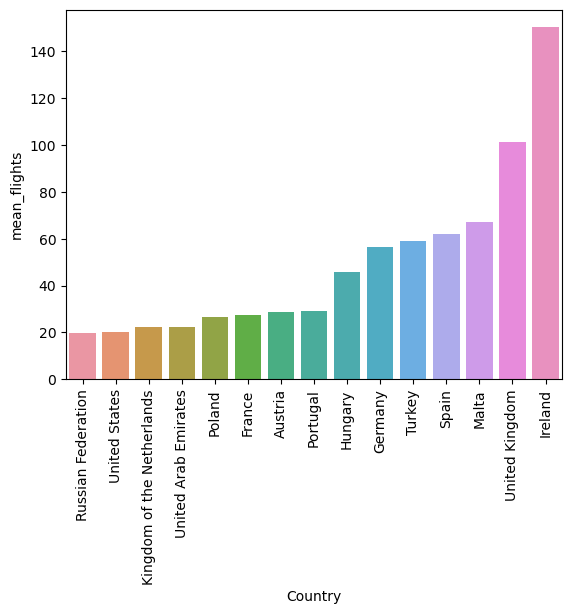

In [38]:
# Grafico de barras (15 países con más vuelos)

import seaborn as sns
import matplotlib.pyplot as plt

dd = df_vuelos.sort_values(by='mean_flights', ascending=False).iloc[:15]
dd = dd.sort_values(by='mean_flights', ascending=True)
sns.barplot(x="Country", y="mean_flights", data=dd)
plt.xticks(rotation=90)
plt.show()

El porcentaje acumulado de estos 15 países representa el 79.29236276849642 % del total de vuelos obtenidos.


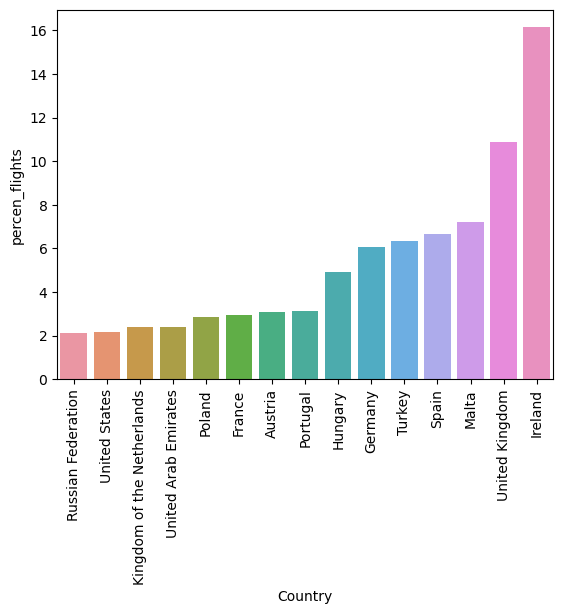

In [39]:
print('El porcentaje acumulado de estos 15 países representa el ' +str(sum(dd['percen_flights']))+ ' % del total de vuelos obtenidos.')

sns.barplot(x="Country", y="percen_flights", data=dd)
plt.xticks(rotation=90)
plt.show()

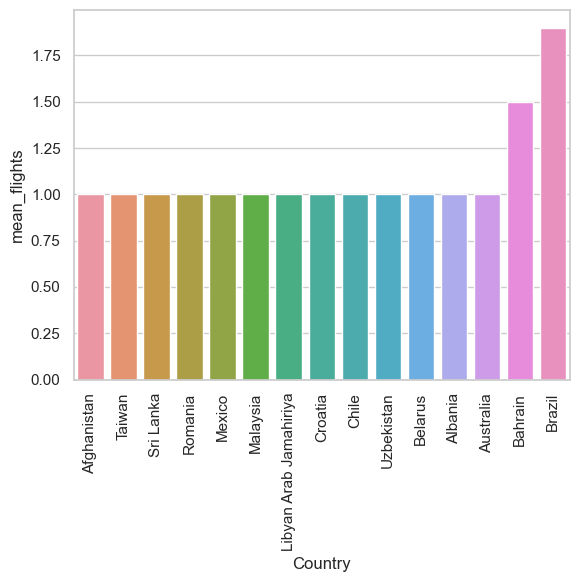

In [40]:
# Grafico de barras (15 países con menos vuelos)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
dd = df_vuelos.sort_values(by='mean_flights', ascending=True).iloc[:15]
ax = sns.barplot(x="Country", y="mean_flights", data=dd)
plt.xticks(rotation=90)
plt.show()

## Parte 2. Web Scraping con Requests-html

La librería **request- Html**  es como una combinación de la librería requests y BeautifulSoup. 

El punto más fuerte es que tiene soporte completo para JavaScript, lo que significa que puede ejecutar JavaScript y nos permite, por tanto, hacer scraping de contenido generado dinámicamente.  Por ejemplo, una aplicación muy común es acceder el contenido que está disponible en las páginas siguientes a la primera, y que cuando navegamos accedemos a él presionando el botón de la página correspondiente.  

Además, para ejecutar JavaScript, podemos usar también el método render de la librería. 

Otra particularización de esta librería es que es necesario iniciar sesión antes de empezar con el scraping del contenido HTML y cerrar sesión cuando se termine. Es decir:
 


```
request_html importar HTMLSession
session = HTMLSession
r = session.get (url_base)
r.html.render
….
session.close()

```






Además, esta librería permite seleccionar los elementos de los documentos html mediant selectores CSS y/o selectores XPath. 


La documentación de esta librería, la cual es recomendable que reviséis para trabajar esta parte, la podéis encontrar en el siguiente enlace:  

https://requests.readthedocs.io/projects/requests-html/en/latest/

Antes de empezar a trabajar con esta librería, es necesario instalarla puesto que Google Collab no la tiene instalada por defecto como ocurria con las librerias que hemos utilizado anteriormente. 

In [1]:
# Instalar libreria 
!pip install requests-html

Una vez instalada, vamos a proceder con el primer ejemplo ilustrativo que nos servirá como guia para realizar el ejercicio práctico planteado a continuación.

En este ejemplo, vamos a hacer scraping al contenido de la conocida página de noticias _Reddit_ (https://reddit.com). De ella, vamos a extraer los titulares y cuántas votaciones tiene cada noticia. Además, vamos a hacer la selección de este contenido mediante _selectores CSS_ para empezar a familiarizarnos con ellos.  

Si presetamos atención a la página, podemos ver que hay contenido que se carga de forma dinámica y/o mediante botones. Particularmente, el contenido se va cargando cuando hacemos "scrolldown", mientras que tambien podemos cargar el contenido asociado a una cuenta, mediante el boton "Sign up". Por tanto, utilizar la librería **requests_html** podría ser recomendable si se quisiera capturar el contenido html que se carga con alguna de estas opciones.

En primer lugar, vamos a cargar la librería e iniciar sesión:

In [ ]:
!pip uninstall bs4

In [6]:
from bs4 import BeautifulSoup

ImportError: cannot import name 'BeautifulSoup' from 'bs4' (unknown location)

In [2]:
# Cargar librería
from requests_html import HTMLSession

# Iniciar sesión
session = HTMLSession()

ModuleNotFoundError: No module named 'BeautifulSoup'

Ahora, hacemos la solicitud y comprobamos cuantos html tenemos en la respuesta.

In [3]:
r = session.get('http://reddit.com')
print((r.html))

NameError: name 'session' is not defined

Podemos observar que los html que devuelve es solo 1. Esto es porque el contenido que se va actualizando y añadiendo dinámicamente mediante "scrolldown" y no mediante el click de un boton de Pagina siguiente, Pagina 2, o similares. 

Ahora, después de inspeccionar la página, advertimos que el contenido relativo a los enlaces de las diferentes entradas o noticias de la página, está en la etiqueta 'a' y cuya classe es '_3ryJoIoycVkA88fy40qNJc'. Por tanto, usando selectores CSS, la instrucción que devolverá el contenidos será: *r.html.find('a._3ryJoIoycVkA88fy40qNJc')*

In [44]:
subreddit = r.html.find('a._3ryJoIoycVkA88fy40qNJc')
print(str(len(subreddit)) + ' titulares aparecen en la primera página de reddit, el resto de titulares se corresponden con el contenido después de hacer scrolldowns')

7 titulares aparecen en la primera página de reddit, el resto de titulares se corresponden con el contenido después de hacer scrolldowns


In [46]:
# Obtener las url completas de cada entrada
subreddit_url=[element.absolute_links for element in subreddit]
subreddit_url

[{'https://www.reddit.com/r/ich_iel/'},
 {'https://www.reddit.com/r/ich_iel/'},
 {'https://www.reddit.com/r/AskReddit/'},
 {'https://www.reddit.com/r/AskReddit/'},
 {'https://www.reddit.com/r/ich_iel/'},
 {'https://www.reddit.com/r/FragReddit/'},
 {'https://www.reddit.com/r/FragReddit/'}]

Ahora vamos a obtener los títulos de las noticias. Este contenido se halla en la etiqueta 'h3' con classe '_eYtD2XCVieq6emjKBH3m'.

In [47]:
# Titulos
subreddit_2 = r.html.find('h3._eYtD2XCVieq6emjKBH3m')
subreddit_titulos=[element.text for element in subreddit_2]
subreddit_titulos

['ich✝❌iel',
 'Buckle up. You can do more, all at once with the lighting-quick M2 chip. Mac Does That.',
 'ich🥃iel',
 'Reddit, what\'s your most "I\'m with the Boomers on this" opinion?',
 'What was great advice 20 years ago, but definitely isn’t now?',
 'Ich\U0001fae1iel',
 'Was besitzt ihr, dass sonst kaum jemand hat?',
 'Was habt ihr schonmal bei Zugfahrten erlebt?']

In [48]:
# Votaciones
subreddit_3 = r.html.find('div._1rZYMD_4xY3gRcSS3p8ODO._25IkBM0rRUqWX5ZojEMAFQ')
subreddit_votaciones=[element.text for element in subreddit_3]
subreddit_votaciones

['2.9k', '4', '2.0k', '8.8k', '23.1k', '705', '261', '99']

Por último, cerraremos la sesión:

In [49]:
session.close()

Ahora vamos a construir el dataframe que contiene el resultado de los títulos y las voraciones. Atendiendo a los datos, el primer titular sin puntuación lo vamos a excluir porque hace referencia a un anuncio.

In [50]:
import pandas as pd

df_reddit=pd.DataFrame()
df_reddit['título']=subreddit_titulos[1:]
df_reddit['votaciones']=subreddit_votaciones[1:]
df_reddit['url']=subreddit_url

In [51]:
pd.set_option('display.max_colwidth', -1)
df_reddit

C:\Users\arnau\AppData\Local\Temp\ipykernel_13888\2182009870.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,título,votaciones,url
0,"Buckle up. You can do more, all at once with the lighting-quick M2 chip. Mac Does That.",4,{https://www.reddit.com/r/ich_iel/}
1,ich🥃iel,2.0k,{https://www.reddit.com/r/ich_iel/}
2,"Reddit, what's your most ""I'm with the Boomers on this"" opinion?",8.8k,{https://www.reddit.com/r/AskReddit/}
3,"What was great advice 20 years ago, but definitely isn’t now?",23.1k,{https://www.reddit.com/r/AskReddit/}
4,Ich🫡iel,705,{https://www.reddit.com/r/ich_iel/}
5,"Was besitzt ihr, dass sonst kaum jemand hat?",261,{https://www.reddit.com/r/FragReddit/}
6,Was habt ihr schonmal bei Zugfahrten erlebt?,99,{https://www.reddit.com/r/FragReddit/}


En este ejemplo, hemos podido scrapear el contenido inicial que aparece en la página de Reddit. No obstante, el contenido que encontramos al hacer _scrolldown_ no lo hemos podido capturar.  

Para poder capturar el resto de entradas, podemos hacer uso de la funcion *render()* de la librería *Request-html*. No obstante, para el uso de esta función es necesario iniciar una sesión en modo asincrona. Los Jupyter notebooks presentan ciertos problemas para trabajar de esta forma y requieren la instalación de _Chromium_; es por eso que en esta PEC no lo vamos a ver. A pesar de ello, a modo explicativo, se adjunta el código que se requeriría:




```
import asyncio
from requests_html import AsyncHTMLSession

asession = AsyncHTMLSession()

async def get_results():
    r = await asession.get('https://reddit.com')
    r.html.arender(scrolldown=10, sleep=1)
    return r

respuesta = asession.run(get_results)

asession.close()

```



Otro ejemplo es la obtención de información de una página que recoge los memes más relevantes en la actualidad (www.knowyourmeme.com). En esta página, a diferencia del ejemplo anterior, el contenido está organizado por páginas y se puede acceder a ellas a través de los típicos botones de páagina 1, 2, 3,... Vamos a ver, por tanto, la respuesta que nos devolvería requests-html en este caso:

In [52]:
# Cargar librería
from requests_html import HTMLSession

# Iniciar sesión
session = HTMLSession()

In [53]:
r2= session.get('https://knowyourmeme.com/')

total_pags_scrap=10
page=0
for html in r2.html:
    page+=1
    print(page, ': ' ,html)
    if page==total_pags_scrap:
        break

1 :  <HTML url='https://knowyourmeme.com/'>
2 :  <HTML url='https://knowyourmeme.com/page/2'>
3 :  <HTML url='https://knowyourmeme.com/page/3'>
4 :  <HTML url='https://knowyourmeme.com/page/4'>
5 :  <HTML url='https://knowyourmeme.com/page/5'>
6 :  <HTML url='https://knowyourmeme.com/page/6'>
7 :  <HTML url='https://knowyourmeme.com/page/7'>
8 :  <HTML url='https://knowyourmeme.com/page/8'>
9 :  <HTML url='https://knowyourmeme.com/page/9'>
10 :  <HTML url='https://knowyourmeme.com/page/10'>


In [54]:
session.close()

En este caso, la respuesta contine los html asociados a las diferentes páginas en las que está organizado el contenido. Como podéis observar, en el bucle se ha introducido un _break_. Esto es porque knowyourmeme.com ofrece la posibilidad de revisar los memes contenidos en  hasta más de 9500 páginas. Esperar a scrapear este total de páginas nos llevaría mucho más tiempo y no es el objetivo de esta PEC.

Considerando los ejemplos que se han facilitado, realizar el ejercicio práctico 3 para explorar la librería Requests-html y familiarizarse con los selectores. 

### **Ejercicio práctico 3 (Nature)**

NATURE (https://www.nature.com/) es una de las más prestigiosas revistas científicas a nivel mundial. En su página web podemos encontrar distinta información como artículos de opinión, noticias, vídeos, libros y también artículos de investigación científica. Si dentro de la pestaña _Explore content_ nos vamos a _Research articles_ podemos encontrar todos los artículos científicos que se van publicando, con opción de filtrar por tema y año, y que pueden ser consultadas a través del link que tiene el mismo título. Mencionar que solamente se puede leer el _abstract_ de los artículos ya que el acceso de los artículos enteros es un servicio de pago.

En este ejercicio vamos a hacer scraping de los artículos científicos publicados más recientemente, sin importar la temática. Esto se corresponderá en hacer scraping de la siguiente dirección web: 'https://www.nature.com/nature/research-articles'

**Parte 1.** Se solicita:

- Obtener mediante scraping y haciendo uso de selectores la siguiente información de cada publicación o referencia que aparece en el resultado de la búsqueda (es decir, en la página web 'https://www.nature.com/nature/research-articles'):

  - Título de la publicación
  - Autores de la publicación
  - URL completa de la entrada en NATURE para cada publicación
  - Fecha de publicación

- Organizar la información scrapeada en forma de dataframe (df_nature_1), de tal forma que cada punto objeto de scraping se corresponda con una columna. Es decir, las columnas serán: 'titulo', 'autores', 'url', 'fecha'.

Haciendo scraping de la dirección web facilitada, hemos obtenido información de los resultados que se facilitan en la primera página de resultados. No obstante, si exploramos Nature podemos ver que hay muchas más páginas con resultados de la búsqueda realizada. 

**Parte2.** Se solicita: 
- Obtener un dataframe (df_pnature_2) como el obtenido del punto anterior, pero que contenga la información de las siguientes 4 páginas de resultados (páginas 2 a 5). Para ello, se debe explorar y observar cómo cambia la url objeto de scraping cuando vamos pasando de páginas. Tras haber observado la morfología de la url, plantear un bucle (similar al proceso realizado en el ejercicio 3) que consiga realizar el el proceso de scraping planteado en el primer punto de este ejercicio para las 4 siguientes páginas de resultados. 


**Parte3.** En la entrada de cada publicación podemos, entre otra información, consultar el abstract. Por tanto, se solicita en este punto:

- obtener, un diccionario que contenga la url y el abstract de las publicaciones que forman parte del df_nature_1. Las claves del diccionario serán los títulos de las publicaciones y los valores para cada clave será un diccionario con dos elementos correspondientes a la url y el abstract.

La forma del diccionario solicitado es la siguiente:



```
{'Titulo 1': {'url': valor de la url
              'abstract': contenido del abstract
             }, 

'Titulo 2': {...

            }
}
```

In [55]:
#Cargar librería
from requests_html import HTMLSession

#Iniciar sesión
session = HTMLSession()

**Parte 1**

In [56]:
# Abrimos sesión y mostramos los datos
r = session.get('https://www.nature.com/nature/research-articles')
print((r.html))

<HTML url='https://www.nature.com/nature/research-articles'>


In [57]:
# Obtener titulo
titulo_publ=[]
for title in r.html.find('div.u-full-height a.c-card__link'):
    titulo_publ.append(title.text)
        
titulo_publ

['A multinational Delphi consensus to end the COVID-19 public health threat',
 'Characterization of SARS-CoV-2 Omicron BA.4 and BA.5 isolates in rodents',
 'Entorhinal cortex directs learning-related changes in CA1 representations',
 'Inulin fibre promotes microbiota-derived bile acids and type 2 inflammation',
 'Blocking PD-L1–PD-1 improves senescence surveillance and ageing phenotypes',
 'Non-redundant functions of group 2 innate lymphoid cells',
 'Light competition drives herbivore and nutrient effects on plant diversity',
 'Nociceptor neurons affect cancer immunosurveillance',
 'Histone H2B.8 compacts flowering plant sperm through chromatin phase separation',
 'Strain-retardant coherent perovskite phase stabilized Ni-rich cathode',
 'Hydroclimatic vulnerability of peat carbon in the central Congo Basin',
 'An optical atomic clock based on a highly charged ion',
 'Broad transcriptomic dysregulation occurs across the cerebral cortex in ASD',
 'Neuropeptide regulation of non-redundant

In [58]:
# Obtener Autores
full_auth=[]
for title in r.html.find('div.u-full-height ul.c-author-list'):
    full_auth.append(title.text)
full_auth

['Jeffrey V. Lazarus\nDiana Romero\nAnne Øvrehus',
 'Ryuta Uraki\nPeter J. Halfmann\nYoshihiro Kawaoka',
 'Christine Grienberger\nJeffrey C. Magee',
 'Mohammad Arifuzzaman\nTae Hyung Won\nDavid Artis',
 'Teh-Wei Wang\nYoshikazu Johmura\nMakoto Nakanishi',
 'Katja J. Jarick\nPatrycja M. Topczewska\nChristoph S. N. Klose',
 'Anu Eskelinen\nW. Stanley Harpole\nYann Hautier',
 'Mohammad Balood\nMaryam Ahmadi\nSebastien Talbot',
 'Toby Buttress\nShengbo He\nXiaoqi Feng',
 'Liguang Wang\nTongchao Liu\nJun Lu',
 'Yannick Garcin\nEnno Schefuß\nSimon L. Lewis',
 'Steven A. King\nLukas J. Spieß\nPiet O. Schmidt',
 'Michael J. Gandal\nJillian R. Haney\nDaniel H. Geschwind',
 'Amy M. Tsou\nHiroshi Yano\nDavid Artis',
 'Joshua T. Atkinson\nLin Su\nCaroline M. Ajo-Franklin',
 'Mary N. Van Dyke\nJonathan M. Levine\nNathan J. B. Kraft',
 'Kaustav Bera\nAlexander Kiepas\nKonstantinos Konstantopoulos',
 'Dongdong Zhang\nYushan Zeng\nRuxin Li',
 'Jianghui Du\nAlan C. Mix\nSharon',
 'Yameng Ren\nDan Zhang

In [59]:
# Obtener Enlaces
links=[]
Titulos = r.html.find('div.u-full-height')
links = [element.absolute_links for element in Titulos]
len(links)

40

In [60]:
# Enlaces sin duplicados
links_uniq = []
[links_uniq.append(x) for x in links if x not in links_uniq]
len(links_uniq)

20

In [61]:
# Obtener Fecha
fecha = []
for title in r.html.find('div.u-full-height time.c-meta__item'):
    fecha.append(title.text)

fecha

['03 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '02 Nov 2022',
 '26 Oct 2022']

In [62]:
# Crear dataframe con resultados
df_nature= pd.DataFrame()
df_nature['titulo']=titulo_publ
df_nature['autores']=full_auth
df_nature['enlaces']=links_uniq
df_nature['fecha']=fecha
df_nature

,titulo,autores,enlaces,fecha
0,A multinational Delphi consensus to end the COVID-19 public health threat,Jeffrey V. Lazarus\nDiana Romero\nAnne Øvrehus,{https://www.nature.com/articles/s41586-022-05398-2},03 Nov 2022
1,Characterization of SARS-CoV-2 Omicron BA.4 and BA.5 isolates in rodents,Ryuta Uraki\nPeter J. Halfmann\nYoshihiro Kawaoka,{https://www.nature.com/articles/s41586-022-05482-7},02 Nov 2022
2,Entorhinal cortex directs learning-related changes in CA1 representations,Christine Grienberger\nJeffrey C. Magee,{https://www.nature.com/articles/s41586-022-05378-6},02 Nov 2022
3,Inulin fibre promotes microbiota-derived bile acids and type 2 inflammation,Mohammad Arifuzzaman\nTae Hyung Won\nDavid Artis,{https://www.nature.com/articles/s41586-022-05380-y},02 Nov 2022
4,Blocking PD-L1–PD-1 improves senescence surveillance and ageing phenotypes,Teh-Wei Wang\nYoshikazu Johmura\nMakoto Nakanishi,{https://www.nature.com/articles/s41586-022-05388-4},02 Nov 2022
5,Non-redundant functions of group 2 innate lymphoid cells,Katja J. Jarick\nPatrycja M. Topczewska\nChristoph S. N. Klose,{https://www.nature.com/articles/s41586-022-05395-5},02 Nov 2022
6,Light competition drives herbivore and nutrient effects on plant diversity,Anu Eskelinen\nW. Stanley Harpole\nYann Hautier,{https://www.nature.com/articles/s41586-022-05383-9},02 Nov 2022
7,Nociceptor neurons affect cancer immunosurveillance,Mohammad Balood\nMaryam Ahmadi\nSebastien Talbot,{https://www.nature.com/articles/s41586-022-05374-w},02 Nov 2022
8,Histone H2B.8 compacts flowering plant sperm through chromatin phase separation,Toby Buttress\nShengbo He\nXiaoqi Feng,{https://www.nature.com/articles/s41586-022-05386-6},02 Nov 2022
9,Strain-retardant coherent perovskite phase stabilized Ni-rich cathode,Liguang Wang\nTongchao Liu\nJun Lu,{https://www.nature.com/articles/s41586-022-05238-3},02 Nov 2022


**Parte 2**

In [63]:
# Scraping 5 paginas de NATURE
# Crear el bucle y hacer scraping

import time

titulo_publ_2=[]
full_auth_2=[]
links_2=[]
links_uniq_2=[]
fecha_2=[]

for pag in range(2,6):
    print('scraping page: ', pag)
    r4 = session.get('https://www.nature.com/nature/research-articles?searchType=journalSearch&sort=PubDate&page='+str(pag))

    for title in r4.html.find('div.u-full-height a.c-card__link'):
        titulo_publ_2.append(title.text)
    for title in r4.html.find('div.u-full-height ul.c-author-list'):
        full_auth_2.append(title.text)
    for title in r4.html.find('div.u-full-height'):
        links_2.append(title.absolute_links)
    for title in r4.html.find('div.u-full-height time.c-meta__item'):
        fecha_2.append(title.text)
    time.sleep(2)

[links_uniq_2.append(x) for x in links_2 if x not in links_uniq_2]
print(len(titulo_publ_2), len(full_auth_2), len(links_uniq_2), len(fecha_2))

scraping page:  2
scraping page:  3
scraping page:  4
scraping page:  5
80 80 80 80


In [64]:
# Crear dataframe con resultados
df_nature_2= pd.DataFrame()
df_nature_2['titulo']=titulo_publ_2
df_nature_2['autores']=full_auth_2
df_nature_2['enlaces']= links_uniq_2
df_nature_2['fecha']=fecha_2
df_nature_2

,titulo,autores,enlaces,fecha
0,Pivotal role of reversible NiO6 geometric conversion in oxygen evolution,Xiaopeng Wang\nShibo Xi\nJunmin Xue,{https://www.nature.com/articles/s41586-022-05296-7},26 Oct 2022
1,Bestrophin-2 and glutamine synthetase form a complex for glutamate release,Aaron P. Owji\nKuai Yu\nTingting Yang,{https://www.nature.com/articles/s41586-022-05373-x},26 Oct 2022
2,3D-printed machines that manipulate microscopic objects using capillary forces,Cheng Zeng\nMaya Winters Faaborg\nVinothan N. Manoharan,{https://www.nature.com/articles/s41586-022-05234-7},26 Oct 2022
3,Structural basis of actin filament assembly and aging,Wout Oosterheert\nBjörn U. Klink\nStefan Raunser,{https://www.nature.com/articles/s41586-022-05241-8},26 Oct 2022
4,Single-cell genomic variation induced by mutational processes in cancer,Tyler Funnell\nCiara H. O’Flanagan\nSamuel Aparicio,{https://www.nature.com/articles/s41586-022-05249-0},26 Oct 2022
...,...,...,...,...
75,Fast charging of energy-dense lithium-ion batteries,Chao-Yang Wang\nTeng Liu\nBrian D. McCarthy,{https://www.nature.com/articles/s41586-022-05281-0},12 Oct 2022
76,Nd isotope variation between the Earth–Moon system and enstatite chondrites,Shelby Johnston\nAlan Brandon\nPeter Copeland,{https://www.nature.com/articles/s41586-022-05265-0},06 Oct 2022
77,Magnetic fields of 30 to 100 kG in the cores of red giant stars,Gang Li\nSébastien Deheuvels\nFrançois Lignières,{https://www.nature.com/articles/s41586-022-05176-0},05 Oct 2022
78,Low-hysteresis shape-memory ceramics designed by multimode modelling,Edward L. Pang\nGregory B. Olson\nChristopher A. Schuh,{https://www.nature.com/articles/s41586-022-05210-1},05 Oct 2022


**Parte 3**

In [65]:
# Creamos el diccionario con la URL y el abstract
dict_publ={}

for url, titulo in zip(links_uniq, titulo_publ):
    print('scraping page: ', str(list(url))[2:-2])
    r3 = session.get(str(list(url))[2:-2])
    data_publ=[]
    for pp in r3.html.find('div.c-article-body div.c-article-section__content'):
        data_publ.append(pp.text)
        dict_publ [titulo]= {'url':url,
                  'abstract':data_publ[0]}    
    time.sleep(2)

dict_publ

scraping page:  https://www.nature.com/articles/s41586-022-05398-2
scraping page:  https://www.nature.com/articles/s41586-022-05482-7
scraping page:  https://www.nature.com/articles/s41586-022-05378-6
scraping page:  https://www.nature.com/articles/s41586-022-05380-y
scraping page:  https://www.nature.com/articles/s41586-022-05388-4
scraping page:  https://www.nature.com/articles/s41586-022-05395-5
scraping page:  https://www.nature.com/articles/s41586-022-05383-9
scraping page:  https://www.nature.com/articles/s41586-022-05374-w
scraping page:  https://www.nature.com/articles/s41586-022-05386-6
scraping page:  https://www.nature.com/articles/s41586-022-05238-3
scraping page:  https://www.nature.com/articles/s41586-022-05389-3
scraping page:  https://www.nature.com/articles/s41586-022-05245-4
scraping page:  https://www.nature.com/articles/s41586-022-05377-7
scraping page:  https://www.nature.com/articles/s41586-022-05297-6
scraping page:  https://www.nature.com/articles/s41586-022-053

{'A multinational Delphi consensus to end the COVID-19 public health threat': {'url': {'https://www.nature.com/articles/s41586-022-05398-2'},
  'abstract': 'Despite notable scientific and medical advances, broader political, socioeconomic and behavioural factors continue to undercut the response to the COVID-19 pandemic1,2. Here we convened, as part of this Delphi study, a diverse, multidisciplinary panel of 386 academic, health, non-governmental organization, government and other experts in COVID-19 response from 112 countries and territories to recommend specific actions to end this persistent global threat to public health. The panel developed a set of 41 consensus statements and 57 recommendations to governments, health systems, industry and other key stakeholders across six domains: communication; health systems; vaccination; prevention; treatment and care; and inequities. In the wake of nearly three years of fragmented global and national responses, it is instructive to note that

## Parte 3. Web Scraping con SerPapi

En esta parte vamos a realizar web scraping utilizando SerpApi. Esta API permite escrapear el contenido que es el resultado de diferentes motores de búsqueda como Google, Yahoo, Youtube,.. Concretamente, en este ejercicio, nos centraremos en los resultados de búsqueda de Youtube.
SerpApi permite el uso gratuito siempre que no excedas las 100 consultas mensuales, asimismo, siempre está la opción desarrollador que incluye la modalidad de pago. Nosotros, utilizaremos las funcionalidades gratuitas de esta API. 
Para poder utilizar SerpApi, y por tanto continuar con la realización de la PAC, se deben seguir estos pasos:
1.	Crear una cuenta en SerpApi para conseguir la clave secreta (API_SECRET__KEY) para poder realizar las diferentes solicitudes web. Para ello debes acceder a esta web: https://serpapi.com. Después de registrarte (es muy sencillo), deberás ir al correo con el que te has registrado para confirmar el correo y ya estarás preparado para utilizar la API.
2.	Instalar el módulo google-search-results para poder acceder a SerpAPI.
3.	Configurar los parámetros de búsqueda, como el ejemplo siguiente:
4.	Pasar los parámetros de búsqueda a la función GoogleSearchResults(searchParams) para obtener los resultados.
5.	Completar el código para realizar la request y obtener los datos deseados. 
6.	Seleccionar el contenido de los resultados que es de interés.

En el siguiente código se puede observar el ejemplo de las instrucciones indicadas:



```
# Instalar modulo google-search-results
!pip install google-search-results

# Cargar librería
from serpapi import GoogleSearch

# Definir parámetros de búsqueda
searchParams = {
      "api_key": API_GOOGLE,
      "engine": "youtube",
      "search_query": "Cambio climatico"
    }

# Realizar solicitud
search = GoogleSearch(searchParams)

# Obtener resultados
results = search.get_dict()
```

No obstante, para la realización correcta de la PEC, se recomienda que se explore la documentación de SerpAPI (https://serpapi.com/search-api) para poder realizar correctamente las consultas y seleccionar correctamente los resultados solicitados


In [7]:
!pip install google-search-results

In [8]:
API_GOOGLE = "8b9f61e9371636d8fa25a5f3b9c487eddab6da4d46d284c7c2026d0cb2c0d699"

In [9]:
# Cargar librería
from serpapi import GoogleSearch

# Definir parámetros de búsqueda
searchParams = {
      "api_key": API_GOOGLE,
      "engine": "youtube",
      "search_query": "Cambio climatico"
    }

# Realizar solicitud
search = GoogleSearch(searchParams)

# Obtener resultados
results = search.get_dict()

https://serpapi.com/search


In [10]:
# Mostramos resultados
results

{'search_metadata': {'id': '63930f4236e6a94143f4fa0f',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/9c61f8c5c854d8ee/63930f4236e6a94143f4fa0f.json',
  'created_at': '2022-12-09 10:34:42 UTC',
  'processed_at': '2022-12-09 10:34:42 UTC',
  'youtube_url': 'https://www.youtube.com/results?search_query=Cambio+climatico',
  'raw_html_file': 'https://serpapi.com/searches/9c61f8c5c854d8ee/63930f4236e6a94143f4fa0f.html',
  'total_time_taken': 1.09},
 'search_parameters': {'engine': 'youtube',
  'search_query': 'Cambio climatico'},
 'search_information': {'total_results': 483747,
  'video_results_state': 'Results for exact spelling'},
 'video_results': [{'position_on_page': 1,
   'title': 'EL CAMBIO CLIMÁTICO EXPLICADO',
   'link': 'https://www.youtube.com/watch?v=miEJI0XQiN4',
   'channel': {'name': 'El Robot de Platón',
    'link': 'https://www.youtube.com/@ElRobotdePlaton',
    'verified': True,
    'thumbnail': 'https://yt3.ggpht.com/BghvkMOlDOYA6uqo9trTlk5Eoth75M

### Ejercicio práctico 4 (Youtube)

En este ejercicio se solicita al estudiante que, haciendo uso de SerpAPi, implemente el código conveniente para resolver a las siguientes cuestiones:

**1. TOP 10** autores españoles:

- Hacer web scrapping (el método preferido para el estudiante) para obtener los 10 primeros artistas españoles del 2022 según Vinilo Negro: https://www.vinilonegro.com/2022/03/top-100-artistas-espanoles-streaming-en-espana-2022/

- Con la lista de los 10, pasar cada nombre por el parámetro "search_query" y realizar una consulta en YouTube para conseguir título del canal, el link, el número de subscriptores y el número de vídeos (en caso que se reporte, de lo contrario dejarlo como N/A). Este paso debería hacerse dentro de un **loop**.

- Con los resultados, crear un dataframe global (top_10), donde las columnas se correspondan con: ['title', 'link', 'subscribers', 'video_count']. Ordenarlo descendientemente por subscriptores.

In [1]:
# Cargar librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Obtener contenido del documento html relativo a los artistas españoles más escuchados  (lista_usuarios)
url_base='https://www.vinilonegro.com/2022/03/top-100-artistas-espanoles-streaming-en-espana-2022/'

# Hacer la solicitud
respuesta = requests.get(url_base)
respuesta.status_code

# Extraer el HTML
html = respuesta.content

# Convertir HTML a BeautifulSoup object. 
soup = BeautifulSoup(html, 'lxml')

# Obtener valores tabla
tabla= soup.find("table")
trs=tabla.find("tbody").find_all('tr')

names_aux = [tr.find_all('td')[1].text for tr in trs]
names = names_aux[1:11]

In [3]:
# Mostramos los nombres
names

['Morad',
 'Aitana',
 'C. Tangana',
 'Beny Jr.',
 'Rosalía',
 'Bad Gyal',
 'Omar Montes',
 'Ana Mena',
 'Rvfv',
 'Melendi']

In [11]:
# Consultamos autor por autor en YouTube
title = []
link = []
subs = []
video_count = []

for artist in names:
    params = {
      "api_key": API_GOOGLE,
      "engine": "youtube",
      "search_query": artist
    }
    
    search = GoogleSearch(params)
    results = search.get_dict()

    for result in results['channel_results']:
        title.append(result['title'])
        link.append(result['link'])
        subs.append(result['subscribers'])
        try:
            video_count.append(result['video_count'])
        except KeyError:
            video_count.append('N/A')

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [14]:
results['channel_results']

[{'position_on_page': 9,
  'title': 'Melendi',
  'link': 'https://www.youtube.com/@MelendiOfficial',
  'verified': True,
  'subscribers': None,
  'thumbnail': 'https://yt3.googleusercontent.com/Z13dawe8EKuG-161DSgx70o17N98sdesodtN32F5hK_ivIGo7cX7wvMSWZdQlSxEBKU4geLQhg=s88-c-k-c0x00ffffff-no-rj-mo'}]

In [12]:
results


{'search_metadata': {'id': '63930f5b1d64ea26c4b87641',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/0cc425a79d42ae60/63930f5b1d64ea26c4b87641.json',
  'created_at': '2022-12-09 10:35:07 UTC',
  'processed_at': '2022-12-09 10:35:07 UTC',
  'youtube_url': 'https://www.youtube.com/results?search_query=Melendi',
  'raw_html_file': 'https://serpapi.com/searches/0cc425a79d42ae60/63930f5b1d64ea26c4b87641.html',
  'total_time_taken': 7.24},
 'search_parameters': {'engine': 'youtube', 'search_query': 'Melendi'},
 'search_information': {'total_results': 2311133,
  'video_results_state': 'Results for exact spelling'},
 'video_results': [{'position_on_page': 1,
   'title': 'Melendi, Aymee Nuviola - Pan Para Yolanda (Video Oficial)',
   'link': 'https://www.youtube.com/watch?v=9DHCZaDRb9Y',
   'channel': {'name': 'Melendi',
    'link': 'https://www.youtube.com/channel/UCKwJMC3Sar-yz5PcwUJxiqg',
    'verified': True,
    'thumbnail': 'https://yt3.ggpht.com/Z13dawe8EKuG-161

In [13]:
# Crear el DataFrame
top_10=pd.DataFrame()
top_10['title']=title
top_10['link']=link
top_10['subscribers']=subs
top_10['video_count']=video_count
top_10

,title,link,subscribers,video_count
0,M.D. L.R,https://www.youtube.com/@MDLR1,1.0,N/A
1,Aitana,https://www.youtube.com/@aitana,NaN,N/A
2,C. Tangana,https://www.youtube.com/@CTanganaOficial,NaN,N/A
3,Beny Jr,https://www.youtube.com/@benyjr341,341.0,N/A
4,ROSALÍA,https://www.youtube.com/@rosalia4526,4526.0,N/A
5,Bad Gyal,https://www.youtube.com/@BadGyal,NaN,N/A
6,OMAR MONTES,https://www.youtube.com/@omarmontes,NaN,N/A
7,Ana Mena,https://www.youtube.com/@AnaMenaOficial,NaN,N/A
8,RVFV,https://www.youtube.com/@503Maffia,503.0,N/A
9,Melendi,https://www.youtube.com/@MelendiOfficial,NaN,N/A


In [11]:
# Ordenarlo descendientemente
top_10.sort_values(by='subscribers', ascending=False)

,title,link,subscribers,video_count
4,ROSALÍA,https://www.youtube.com/channel/UCQt9awGIFZeld...,9870000.0,91
9,Melendi,https://www.youtube.com/@MelendiOfficial,4390000.0,N/A
2,C. Tangana,https://www.youtube.com/@CTanganaOficial,2220000.0,77
1,Aitana,https://www.youtube.com/@aitana,2130000.0,100
7,Ana Mena,https://www.youtube.com/@AnaMenaOficial,969000.0,36
8,RVFV,https://www.youtube.com/@503Maffia,964000.0,44
5,Bad Gyal,https://www.youtube.com/@BadGyal,782000.0,76
6,OMAR MONTES,https://www.youtube.com/@omarmontes,737000.0,53
3,Beny Jr,https://www.youtube.com/channel/UCFkew7OWYW2AV...,496000.0,70
0,M.D. L.R,https://www.youtube.com/c/MDLR1,1.0,N/A


**2. Obtener**:

  - ¿Cuáles son los títulos de los videos que aparecen cuando buscamos "climate change"? ¿Qué 10 títulos son los que tienen más visualizaciones?  
  -  ¿Cuantos videos en total aparecen en la búsqueda?


In [15]:
# Hacemos la consulta
params = {
  "api_key": API_GOOGLE,
  "engine": "youtube",
  "search_query": "climate change"
}

search = GoogleSearch(params)
results2 = search.get_dict()

results2

https://serpapi.com/search


{'search_metadata': {'id': '63930ff40f9866139c9b1607',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/85db6342d4bcf431/63930ff40f9866139c9b1607.json',
  'created_at': '2022-12-09 10:37:40 UTC',
  'processed_at': '2022-12-09 10:37:40 UTC',
  'youtube_url': 'https://www.youtube.com/results?search_query=climate+change',
  'raw_html_file': 'https://serpapi.com/searches/85db6342d4bcf431/63930ff40f9866139c9b1607.html',
  'total_time_taken': 2.39},
 'search_parameters': {'engine': 'youtube', 'search_query': 'climate change'},
 'search_information': {'total_results': 20849782,
  'video_results_state': 'Results for exact spelling'},
 'video_results': [{'position_on_page': 1,
   'title': 'What is Climate Change?: Crash Course Climate & Energy #01',
   'link': 'https://www.youtube.com/watch?v=9PFhrpyWV-w',
   'channel': {'name': 'CrashCourse',
    'link': 'https://www.youtube.com/@crashcourse',
    'verified': True,
    'thumbnail': 'https://yt3.ggpht.com/ytc/AMLnZu-9vZVC

In [16]:
results2['people_also_watched']

[{'position_on_page': 10,
  'title': "This is why we CAN'T Go Back To The Moon",
  'link': 'https://www.youtube.com/watch?v=bgZVi9PSQM8',
  'channel': {'name': 'Video Advice',
   'link': 'https://www.youtube.com/@VideoAdvice',
   'verified': True,
   'thumbnail': 'https://yt3.ggpht.com/ytc/AMLnZu_folRnLh4xiAGvalOrAurmsoFBoUyQ1bP-PiQvRg=s68-c-k-c0x00ffffff-no-rj'},
  'published_date': '1 month ago',
  'views': 294359,
  'length': '12:54',
  'description': 'When the Apollo-12 crew landed on the lunar surface, they saw that the landing was observed by a half-transparent, pyramidal\xa0...',
  'thumbnail': {'static': 'https://i.ytimg.com/vi/bgZVi9PSQM8/hqdefault.jpg?sqp=-oaymwEcCOADEI4CSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLC9RPVhBFJATfBWUwkFOet7RbbNbQ',
   'rich': 'https://i.ytimg.com/an_webp/bgZVi9PSQM8/mqdefault_6s.webp?du=3000&sqp=CLSHzJwG&rs=AOn4CLCoRu09NwZEN3ohYYL-Yt0AdRVhUg'}},
 {'position_on_page': 11,
  'title': '"THEY ARE COMING" - Anonymous FINALLY Breaks Silence On Aliens!',


In [17]:
# Resultados encontrados 
results2['search_information']

{'total_results': 20849782,
 'video_results_state': 'Results for exact spelling'}

In [14]:
# Creamos el DataFrame, lo ordenamos y mostramos los 10 videos más vistos

titulos=[]
vistas=[]

for res in results2['video_results']:
    titulos.append(res['title'])
    vistas.append(res['views'])

df_videos=pd.DataFrame()
df_videos['titulos']=titulos
df_videos['vistas']=vistas

print('Los títulos de los 10 videos más vistos: \n')
df_videos.sort_values(by='vistas', ascending=False).iloc[0:10]

Los títulos de los 10 videos más vistos: 



,titulos,vistas
8,We WILL Fix Climate Change!,9416344
5,See what three degrees of global warming looks...,2687589
18,Climate Change Explained Simply,1507962
3,What is Climate Change? | Start Here,999825
6,Wind and climate change | DW Documentary,825261
17,What Will Earth Look Like When These 6 Tipping...,818556
9,Which U.S. Cities Are Safest From Climate Change?,600633
7,The Biggest Myth About Climate Change,384271
4,When The World Gets 1℃ Hotter | Climate Change...,322299
12,The Tipping Point | Climate Change: The Facts ...,225741


**3. Obtener**:

  - El título y duración de las **películas** que aparecen en Youtube cuando buscamos "James Bond".
  - Obtener los videos relacionados (**"people_also_watched'**) con los resultados de la búsqueda "Oscar ceremony 2022". Con esta información crear un dataframe que contenga tantas filas como videos relacionados obtenidos y las columnas relativas a la información del nombre del canal donde está publicado el video, titulo del vídeo, vistas del video y link del video.

In [15]:
# Hacemos la consulta de James Bond
params = {
  "api_key": API_GOOGLE,
  "engine": "youtube",
  "search_query": "James Bond"
}

search = GoogleSearch(params)
results3a = search.get_dict()

results3a

https://serpapi.com/search


{'search_metadata': {'id': '63756051437af28798ddc95d',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/f4b26ca9b970d82f/63756051437af28798ddc95d.json',
  'created_at': '2022-11-16 22:12:33 UTC',
  'processed_at': '2022-11-16 22:12:33 UTC',
  'youtube_url': 'https://www.youtube.com/results?search_query=James+Bond',
  'raw_html_file': 'https://serpapi.com/searches/f4b26ca9b970d82f/63756051437af28798ddc95d.html',
  'total_time_taken': 1.4},
 'search_parameters': {'engine': 'youtube', 'search_query': 'James Bond'},
 'search_information': {'total_results': 23345602,
  'video_results_state': 'Results for exact spelling'},
 'movie_results': [{'position_on_page': 1,
   'title': 'Casino Royale (2006)',
   'link': 'https://www.youtube.com/watch?v=-9TZJHejccw',
   'channel': {'name': 'YouTube Movies & TV',
    'link': 'https://www.youtube.com/channel/UClgRkhTL3_hImCAmdLfDE4g',
    'verified': True},
   'length': '2:24:34',
   'description': "Based on Ian Fleming's first 00

In [20]:
results3a['people_also_watched']

[{'position_on_page': 15,
  'title': 'MY NAME IS JAMES BOND...TAG  BY ATTY TOPACIO',
  'link': 'https://www.youtube.com/watch?v=ynr-3l9F9-Q',
  'channel': {'name': "JDB's Comments PRO FILIPINO",
   'link': 'https://www.youtube.com/@JDB',
   'verified': True,
   'thumbnail': 'https://yt3.ggpht.com/NiBsHX6AUhWks-OCS9sW3uQi6VHrphc0j96PfRQqXmGQ_pUgJoDS4UlyzByguSQsp6gTw1Ff=s68-c-k-c0x00ffffff-no-rj'},
  'published_date': '2 hours ago',
  'views': 1892,
  'length': '32:07',
  'description': 'MY NAME IS JAMES BOND...TAG BY ATTY TOPACIO.',
  'extensions': ['New'],
  'thumbnail': {'static': 'https://i.ytimg.com/vi/ynr-3l9F9-Q/hq720.jpg?sqp=-oaymwEcCOgCEMoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLBhSiEUp__bkmyIgl6jEs9w1MP4Ow',
   'rich': 'https://i.ytimg.com/an_webp/ynr-3l9F9-Q/mqdefault_6s.webp?du=3000&sqp=CLyr1ZsG&rs=AOn4CLAKXzWqJfw-QH6GEm5f2I3VkfK8NA'}},
 {'position_on_page': 16,
  'title': "'Bloomberg The Open' Full Show (11/16//2022)",
  'link': 'https://www.youtube.com/watch?v=bAqTIROzzRk

In [16]:
# Extraemos y mostramos los resultados
for movie in results3a['movie_results']:
    print(movie['title'], '--> duracion: ',movie['length'], 'horas')

Casino Royale (2006) --> duracion:  2:24:34 horas


In [17]:
# Hacemos la consulta de "poeple also watched"
params = {
  "api_key": API_GOOGLE,
  "engine": "youtube",
  "search_query": "Oscar ceremony 2022",
}

search = GoogleSearch(params)
results3b = search.get_dict()

results3b

https://serpapi.com/search


{'search_metadata': {'id': '6375605ea5ad6d6a66a72c52',
  'status': 'Success',
  'json_endpoint': 'https://serpapi.com/searches/722e42d64135ca32/6375605ea5ad6d6a66a72c52.json',
  'created_at': '2022-11-16 22:12:46 UTC',
  'processed_at': '2022-11-16 22:12:46 UTC',
  'youtube_url': 'https://www.youtube.com/results?search_query=Oscar+ceremony+2022',
  'raw_html_file': 'https://serpapi.com/searches/722e42d64135ca32/6375605ea5ad6d6a66a72c52.html',
  'total_time_taken': 1.24},
 'search_parameters': {'engine': 'youtube',
  'search_query': 'Oscar ceremony 2022'},
 'search_information': {'total_results': 3177617,
  'video_results_state': 'Results for exact spelling'},
 'video_results': [{'position_on_page': 1,
   'title': 'OSCARS 2022 : Every Winner - TRIBUTE VIDEO',
   'link': 'https://www.youtube.com/watch?v=p7QgrzSn3rA',
   'channel': {'name': 'CineVore',
    'link': 'https://www.youtube.com/channel/UCObIANCvuc-XAVxSdCmQN5Q',
    'thumbnail': 'https://yt3.ggpht.com/ytc/AMLnZu9b61P1iwx1KP0mM0

In [19]:
results3b['people_also_watched']

[{'position_on_page': 10,
  'title': 'CNN Banned From Ukraine After Showing N@zi Salute',
  'link': 'https://www.youtube.com/watch?v=Px51U_pfOB4',
  'channel': {'name': 'The Jimmy Dore Show',
   'link': 'https://www.youtube.com/@thejimmydoreshow',
   'verified': True,
   'thumbnail': 'https://yt3.ggpht.com/QLpYg9p-DiKQapV4UmHWrJrhqfpV1V0WK5WORO7g1RDfF30XNSx-5hGigruCYQUW3XYsHyCDLw=s68-c-k-c0x00ffffff-no-rj'},
  'published_date': '1 day ago',
  'views': 162587,
  'length': '11:43',
  'description': 'Become a Premium Member: https://jimmydorecomedy.com/join Go to a Live Show: https://jimmydorecomedy.com/tour Subscribe\xa0...',
  'extensions': ['New'],
  'thumbnail': {'static': 'https://i.ytimg.com/vi/Px51U_pfOB4/hq720.jpg?sqp=-oaymwEcCOgCEMoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLAJXbvCgqqJ1DqkTj0KQKxX19qfZw',
   'rich': 'https://i.ytimg.com/an_webp/Px51U_pfOB4/mqdefault_6s.webp?du=3000&sqp=CIi71ZsG&rs=AOn4CLC1GDz4_k6eyDIjvxmqSz3IZ3OHsA'}},
 {'position_on_page': 11,
  'title': 'Trump’s

In [18]:
# Creamos y mostramos el dataframe con los resultados
title=[]
user=[]
views=[]
link=[]

for res in results3b['people_also_watched']:
    title.append(res['title'])
    user.append(res['channel']['name'])
    try:
        views.append(res['views'])
    except KeyError:
        views.append('N/A')
    link.append(res['link'])

df_related= pd.DataFrame()
df_related['title']=title
df_related['user']=user
df_related['views']=views
df_related['link']=link
df_related

,title,user,views,link
0,CNN Banned From Ukraine After Showing N@zi Salute,The Jimmy Dore Show,162587,https://www.youtube.com/watch?v=Px51U_pfOB4
1,"Trump’s BIG Announcement at Mar-a-Lago, GOP Ke...",Jimmy Kimmel Live,2121807,https://www.youtube.com/watch?v=1TA2m7t0aHk
2,Oscar's Oasis - NEW YEAR SPECIAL COMPILATION [...,Oscar's Oasis Official,7226109,https://www.youtube.com/watch?v=QdtZgbSuDOo
3,Lady Gaga and Liza Minnelli present Best Pictu...,In Case You Missed It,491711,https://www.youtube.com/watch?v=aTRlBrZcfhY
4,Oscar's Oasis - DECEMBER COMPILATION [ 25 MINU...,Oscar's Oasis Official,20750607,https://www.youtube.com/watch?v=Glzbyjf0yEw
5,Met Gala 2022: Live From E! Stream FULL Livest...,E! Insider,1345217,https://www.youtube.com/watch?v=iE-6ERWjBoo
6,"Dr. Dre, Snoop Dogg, Eminem, Mary J. Blige, Ke...",NFL,140789354,https://www.youtube.com/watch?v=gdsUKphmB3Y
7,the most chaotic award show moments to see the...,qualitea,10191420,https://www.youtube.com/watch?v=H2t7OvMyLMU
8,75th EE BAFTA Film Awards 2022,The Best Event Gang,108923,https://www.youtube.com/watch?v=39yRXihleWQ
9,‘The Godfather’ Reunion Brings Cast And Direct...,TODAY,4422324,https://www.youtube.com/watch?v=qBQ4JeEuLro
